<a href="https://colab.research.google.com/github/danielrpiccoli/trabalho-icn-2025/blob/main/Trabalho_ICN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final de Introdução à Computação Numérica (2025.2)

**Dupla:**
* Daniel Rossano Piccoli de Oliveira
* Davi de Lacerda Iecin


## 0. Importação de Bibliotecas
Rodar esta célula para carregar as ferramentas.

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip install numpy matplotlib sympy
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.abc import x
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

## 1. Método de interpolação de Lagrange:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def interpolacao_lagrange(pontos_x, pontos_y):
    """
    Implementação do método de Lagrande.

    O polinômio interpolador P(x) é dado pela combinação linear:
    P(x) = sum(y_i) * L_i(x)) para i de 0 a n, onde L_i(x) são os
    polinômios de base de Lagrange definidos pelo produtório:
    L_i(x) = prod((x - x_j) / (x_i - x_j)) para j != i.

    Parâmetros:
        pontos_x (list/array): Coordenadas x dos pontos conhecidos (nós)
        pontos_y (list/array): Coordenadas y dos pontos conhecidos (valores da função)

    Saída:
        expressao_final (sympy.Expr): A expressão simbólica exata do polinômio
        funcao_numerica (function): Uma função vetorizada para cálculos nuuméricos e plots
    """

        # É usado o SymPy para manipular x e permitir a construção algébrica da equação antes de calcular os valores numéricos
    x = sp.symbols('x')

    # n determina o grau máximo do polinômio
    n = len(pontos_x)

    # Somatório final dos termos y_i * L_i(x) inicializado
    polinomio = 0


    # Loop que representa o somatório da fóruma de Lagrange
    for i in range(n):
        L_i = 1 # Inicializa o polinômio da base L_i(x) como 1 para que seja neutro na multiplicação

        # Loop que contrói o produtório para o termo L_i
        for j in range(n):
            if i != j: # Para evitar divisão por zero (x_i - x_i) e garantir que L_i(x_i) = 1
                L_i = L_i * (x - pontos_x[j]) / (pontos_x[i] - pontos_x[j])

        polinomio = polinomio + pontos_y[i] * L_i

    # Simplificação algébrica que agrupa os termos semelhantes
    expressao_final = sp.simplify(polinomio)

    # Transforma a expressão do SymPy em uma função Python
    funcao_numerica = sp.lambdify(x, expressao_final, modules=['numpy'])

    return expressao_final, funcao_numerica

# Problemas resolvidos com interpolação:

## Problema 1: Interpolando 3 pontos aleatórios:

O Polinômio de Lagrage f(x) é: 
     2           
  5⋅x    17⋅x    
- ──── + ──── + 1
   6      6      


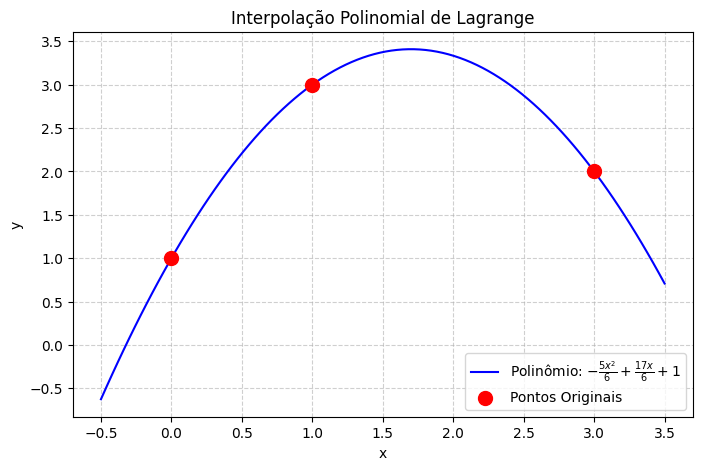

In [28]:
x_input = [0, 1, 3]
y_input = [1, 3, 2]

equacao, funcao = interpolacao_lagrange(x_input, y_input)
print("O Polinômio de Lagrage f(x) é: ")
sp.pprint(equacao)

x_plot = np.linspace(min(x_input) - 0.5, max(x_input) + 0.5, 100)
y_plot = funcao(x_plot)

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, label=f'Polinômio: ${sp.latex(equacao)}$', color='blue')
plt.scatter(x_input, y_input, color='red', s=100, zorder=5, label='Pontos Originais')
plt.title("Interpolação Polinomial de Lagrange")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Problema 2: Trajetória de Pulo

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
x_pulo = [0, 2, 4]
y_pulo = [0, 10, 0]
eq_pulo, func_pulo = interpolacao_lagrange(x_pulo, y_pulo)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-1, 12)

ax.axhline(0, color='black', linewidth=3)
x_fundo = np.linspace(0, 4, 100)
ax.plot(x_fundo, func_pulo(x_fundo), 'g--', alpha=0.3, label='Trajetória Prevista')

personagem, = ax.plot([], [], 'ro', markersize=15, zorder=5, label='Player')
ax.legend(loc='upper right')
ax.set_title("Simulação de salto com Lagrange")
ax.grid(True, linestyle=':', alpha=0.5)

def init():
    personagem.set_data([], [])
    return personagem,

def update(frame):
    x = frame
    y = func_pulo(x)

    personagem.set_data([x], [y])
    return personagem,

frames_x = np.linspace(0, 4, 60)
anim = FuncAnimation(fig, update, frames=frames_x, init_func=init, blit=True, interval=50)

plt.close()
HTML(anim.to_jshtml())

## Problema 3: Criptografia de Shamir

In [30]:
x_cripto = [1, 3, 5]
y_cripto = [12, 54, 132]

eq_cripto, func_cripto = interpolacao_lagrange(x_cripto, y_cripto)

print("Polinômio Reconstrutor: ")
sp.pprint(eq_cripto)

segredo = func_cripto(0)
print(f"\nO segredo revelado é: {int(segredo)}")

Polinômio Reconstrutor: 
   2          
9⋅x          9
──── + 3⋅x + ─
 2           2

O segredo revelado é: 4


## 2. Método de Interpolação Numérica com Trapézio:

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_trapezio(f, a, b, n):
    """
    Implementação da regra do trapézio para integração numérica
    A integração definida de f(x) entre a e b é aproximada pela soma
    das áreas de n trapézios de largura h.
    Fórmula: I = (h/2) * [f(x_0) + 2 * sum(f(x_i)) + f(x_n)]

    Parâmetros:
        f (function) -> Função matemárica a ser integrada
        a (float) -> Limite inferior da integração
        b (float) -> Limite superior da integração
        n (int) -> Número de subintervalos

    Output:
        integral (float) -> Valor numérico aproximado da área
        x_vals (array) -> Pontos x usados na discretização
        y_vals (array) -> Valores de f(x) calculados

    """

    if n <= 0:
        raise ValueError("Número de intervalos n deve ser positivo")

    h = (b - a) / n # Cálculo da largura da base de cada trapézio

    # Criado array com n + 1 pontos igualmente espaçados entre a e b
    x_vals = np.linspace(a, b, n+1)

    # Aplica a função f em todos os pontos de uma vez
    y_vals = f(x_vals)

    # Aplicação da fórmula do trapézio
    soma_pontas = y_vals[0] + y_vals[-1]
    soma_meio = 2 * np.sum(y_vals[1:-1])
    integral = (h / 2) * (soma_pontas + soma_meio)

    return integral, x_vals, y_vals

# Problemas resolvidos com trapézio

## Problema 1: Cálculo da aproximação da integral de sin(x) de 0 a π

In [ ]:
# Valor exato conhecido: -cos(π) - (-cos(0)) = 1 - (-1) = 2

f1 = lambda x: np.sin(x) # Função definida

a1, b1 = 0, np.pi # Intervalos [0, π]
n1 = 10 # Número de trapézios

# Cálculo
resultado1, x1, y1 = metodo_trapezio(f1, a1, b1, n1)

print(f"Função Seno:")
print(f"Resultado aproximado (n={n1}): {resultado1:.6f}")
print(f"Resultado exato: 2.000000")
print(f"Erro absoluto: {abs(2 - resultado1):.6f}")

Função Seno:
Resultado aproximado (n=10): 1.983524
Resultado exato: 2.000000
Erro absoluto: 0.016476


## Problema 2: Cálculo de trabalho

In [33]:
# Trabalho é a integral da Força em relação à distância
# Considerando um elástico sendo esticado,
# a função da força: f(x) = 100 * x * e^(-x) (Força aumenta e depois diminui)

def forca_elastica(x):
    return 100 * x * np.exp(-x)

a2, b2 = 0, 5 # Intervalo -> estica de 0 a 5 metros
n2 = 50 # Número de trapézios

trabalho, x2, y2 = metodo_trapezio(forca_elastica, a2, b2, n2)

print(f"\nElástico:")
print(f"Trabalho realizado para deslocar de {a2}m a {b2}m:")
print(f"W = {trabalho:.4f} Joules")


Elástico:
Trabalho realizado para deslocar de 0m a 5m:
W = 95.8717 Joules


## Problema 3: Probabilidade

In [34]:
# Calcular a probabilidade de uma variável aleatória cair entre -1 e 1 desvios padrões

def normal_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

a3, b3 = -1, 1
n3 = 100

probabilidade, x3, y3 = metodo_trapezio(normal_pdf, a3, b3, n3)

print(f"\n Estatística: ")
print(f"Probabilidade P({a3} <= Z <= {b3}): {probabilidade:.2%}")


 Estatística: 
Probabilidade P(-1 <= Z <= 1): 68.27%


## 3. Método de Taylor

In [35]:
def metodo_taylor(expressao_funcao, x0, x_alvo, n):
    """
    Implementação da Série de Taylor.
    Aproxima f(x) em torno de um ponto x0 usando um polinômio de grau n.
    Fórmula: P_n(x) = sum( (f^(k)(x0) / k!) * (x - x0)^k )

    Parâmetros:
        expressao_funcao (sympy expr): A função simbólica f(x)
        x0 (float): O ponto onde a série é centrada
        x_alvo (float): O ponto onde queremos estimar o valor
        n (int): A ordem do polinômio (número de derivadas)

    Saída:
        valor_aprox (float): O resultado numérico da aproximação
        polinomio (sympy expr): A expressão do polinômio gerado
        erro (float): A diferença absoluta (se soubermos o valor real)
    """
    x = sp.symbols('x')
    polinomio = 0

    # Construção da série somando termo a termo
    for k in range(n + 1):
        derivada_k = sp.diff(expressao_funcao, x, k) # Calcula a k-ésima derivada
        valor_derivada = derivada_k.subs(x, x0)      # Avalia a derivada em x0
        termo = (valor_derivada / sp.factorial(k)) * (x - x0)**k
        polinomio += termo

    valor_aprox = float(polinomio.subs(x, x_alvo))

    return valor_aprox, polinomio

# Problemas resolvidos com Taylor

## Problema 1: Aproximando a exponencial

In [36]:
x = sp.symbols('x')
f1 = sp.exp(x)
x_base = 0
x_estimar = 1 # Queremos estimar e^1
ordem = 5

val, poli = metodo_taylor(f1, x_base, x_estimar, ordem)

print("Problema 1: Exponencial")
print(f"Polinômio: {poli}")
print(f"Valor estimado de e^1: {val:.6f}")
print(f"Valor real (numpy): {np.e:.6f}\n")

Problema 1: Exponencial
Polinômio: x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
Valor estimado de e^1: 2.716667
Valor real (numpy): 2.718282



## Problema 2: Função Logarítmica (ln)

In [37]:
# Aproximar ln(x) em torno de 1, para calcular ln(1.5)
f2 = sp.ln(x)
val2, poli2 = metodo_taylor(f2, 1, 1.5, 4)

print("Problema 2: Logaritmo Natural")
print(f"Estimando ln(1.5) com ordem 4: {val2:.6f}")
print(f"Valor real: {np.log(1.5):.6f}\n")

Problema 2: Logaritmo Natural
Estimando ln(1.5) com ordem 4: 0.401042
Valor real: 0.405465



## Problema 3: Física (Movimento) Simulando uma função de posição complexa aproximada por um polinômio simples

In [38]:
# Suponha uma trajetória f(x) = sin(x) + cos(x)
f3 = sp.sin(x) + sp.cos(x)
val3, poli3 = metodo_taylor(f3, 0, 0.5, 3)

print("Problema 3: Trajetória Física")
print(f"Posição aproximada em t=0.5: {val3:.6f}")

Problema 3: Trajetória Física
Posição aproximada em t=0.5: 1.354167


# 4. Método da Bisseção

In [39]:
def metodo_bissecao(f, a, b, tol=1e-6, max_iter=100):
    """
    Encontra a raiz de f(x) no intervalo [a, b] usando o método da Bisseção.

    Parâmetros:
        f (function): Função numérica (lambda ou def)
        a, b (float): Limites do intervalo (f(a) e f(b) devem ter sinais opostos)
        tol (float): Tolerância do erro
    """
    if f(a) * f(b) >= 0:
        print("Erro: A função deve ter sinais opostos em a e b.")
        return None

    iteracoes = 0
    historico = [] # Para plotagem se necessário

    m = (a + b) / 2

    while (b - a) / 2 > tol and iteracoes < max_iter:
        m = (a + b) / 2
        historico.append(m)

        if f(m) == 0:
            return m, historico # Achou a raiz exata

        if f(a) * f(m) < 0:
            b = m
        else:
            a = m

        iteracoes += 1

    return m, historico

# Problemas resolvidos com Bisseção

## Problema 1: Raiz cúbica
## Encontrar a raiz de $x^3 - 9x + 3 = 0$

In [40]:
func1 = lambda x: x**3 - 9*x + 3
raiz1, hist1 = metodo_bissecao(func1, 0, 1)

print("Problema 1: Polinômio Cúbico")
print(f"Raiz encontrada no intervalo [0, 1]: {raiz1:.6f}")

Problema 1: Polinômio Cúbico
Raiz encontrada no intervalo [0, 1]: 0.337610


## Problema 2: Equação Transcendental
## Resolver $x - \cos(x) = 0$

In [41]:
func2 = lambda x: x - np.cos(x)
raiz2, hist2 = metodo_bissecao(func2, 0, 1) # Sabemos que a raiz está entre 0 e 1

print("\nProblema 2: x - cos(x) = 0")
print(f"Raiz aproximada: {raiz2:.6f}")


Problema 2: x - cos(x) = 0
Raiz aproximada: 0.739084


## Problema 3: Engenharia Civil (Viga) Determinar o ponto onde o momento fletor é zero em uma viga

In [42]:
# Momento M(x) = -x^2 + 4x - 3 (zeros em 1 e 3)
func_viga = lambda x: -x**2 + 4*x - 3
raiz_viga, _ = metodo_bissecao(func_viga, 2.5, 4.0)

print("\nProblema 3: Momento Fletor Zero")
print(f"Ponto de momento nulo: {raiz_viga:.4f}m")


Problema 3: Momento Fletor Zero
Ponto de momento nulo: 3.0000m


# 5. Método de Newton

In [43]:
def metodo_newton(expressao_f, x0, tol=1e-6, max_iter=50):
    """
    Encontra a raiz usando a tangente (derivada).
    x_{n+1} = x_n - f(x_n) / f'(x_n)
    """
    x = sp.symbols('x')
    f_derivada = sp.diff(expressao_f, x)

    # Transforma em funções numéricas rápidas
    f_num = sp.lambdify(x, expressao_f, 'numpy')
    df_num = sp.lambdify(x, f_derivada, 'numpy')

    x_atual = x0
    caminho_x = [x0]

    for i in range(max_iter):
        y = f_num(x_atual)
        dy = df_num(x_atual)

        if abs(dy) < 1e-10: # Evita divisão por zero
            print("Derivada muito próxima de zero.")
            break

        x_novo = x_atual - (y / dy)
        caminho_x.append(x_novo)

        if abs(x_novo - x_atual) < tol:
            return x_novo, caminho_x

        x_atual = x_novo

    return x_atual, caminho_x

# Problemas resolvidos com Newton

## Problema 1: Raiz Quadrada Manual
## Calcular $\sqrt{2}$ resolvendo $x^2 - 2 = 0$.

In [44]:
x = sp.symbols('x')
eq1 = x**2 - 2
raiz_newton1, caminho1 = metodo_newton(eq1, 1.0) # Chute inicial 1.0

print("Problema 1: Raiz de 2")
print(f"Resultado Newton: {raiz_newton1:.10f}")
print(f"Resultado Numpy: {np.sqrt(2):.10f}")

Problema 1: Raiz de 2
Resultado Newton: 1.4142135624
Resultado Numpy: 1.4142135624


## Problema 2: Ponto de intersecção
## Onde $e^{-x} = x$? (ou seja, $e^{-x} - x = 0$)

In [45]:
eq2 = sp.exp(-x) - x
raiz_newton2, _ = metodo_newton(eq2, 0.5)

print("\nProblema 2: Intersecção e^-x = x")
print(f"X onde se cruzam: {raiz_newton2:.6f}")


Problema 2: Intersecção e^-x = x
X onde se cruzam: 0.567143


## Problema 3: Visualização Gráfica da Convergência


Problema 3: Convergência Visual


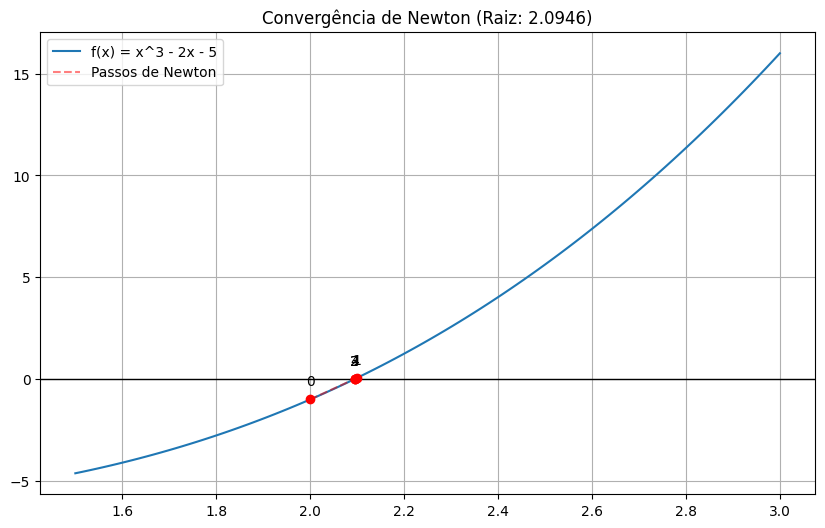

In [46]:
# Problema: Raiz de x^3 - 2x - 5 = 0
eq3 = x**3 - 2*x - 5
raiz3, caminho = metodo_newton(eq3, 2.0)

print("\nProblema 3: Convergência Visual")

# Plotagem
x_vals = np.linspace(1.5, 3.0, 100)
f_func = sp.lambdify(x, eq3, 'numpy')
y_vals = f_func(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^3 - 2x - 5')
plt.axhline(0, color='black', lw=1)

# Plota os passos do Newton
caminho = np.array(caminho)
vals_caminho = f_func(caminho)
plt.scatter(caminho, vals_caminho, color='red', zorder=5)
plt.plot(caminho, vals_caminho, color='red', linestyle='--', alpha=0.5, label='Passos de Newton')

for i, txt in enumerate(caminho):
    plt.annotate(f"{i}", (caminho[i], vals_caminho[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title(f"Convergência de Newton (Raiz: {raiz3:.4f})")
plt.legend()
plt.grid(True)
plt.show()

# 6 Método das equações diferenciais com diferenças finitas

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_edo(f, y0, t0, tf, h):
    """
    Resolve uma equação diferencial ordinária pelo método de Euler

    Aproxima a derivada dy/dt = (y[i+1] - y[i]) / h
    Isolando y[i+1] tem-se y[i+1] = y[i] + h * f(t[i], y[i])

    Parâmetros:
        f(function) -> Função derivada dy/dt = f(t, y)
        y0(float) -> Condição inicial (y quando t = t0)
        t0(float) -> Tempo inicial
        tf(float) -> Tempo final
        h(float) -> Passo de tempo

    Output:
        t_vals(array) -> Vetor de tempo
        y_vals(array) -> Vetor com solução aproximada de y
     """

    t_vals = np.arange(t0, tf + h, h) # Vetor de tempo de t0 a tf com passos de h

    y_vals = np.zeros(len(t_vals)) # Vetor de y preenchido com zeros do mesmo tamanho de t

    y_vals[0] = y0 # Condição inicial

    for i in range(len(t_vals) - 1):
        derivada = f(t_vals[i], y_vals[i]) # Derivada atual
        y_vals[i+1] = y_vals[i] + h * derivada # Passo de Euler (y_novo = y_atual + passo * inclinação)

    return t_vals, y_vals


# Problemas resolvidos com EDOs

## Problema 1: Crescimento populacional

In [48]:
# Crescimento de bactérias
# Equação: dP/dt = 0.5 * P (cresce 50% por unidade de tempo)
#P(0) = 10 bactérias

def crescimento_bacterias(t, P):
    k = 0.5 # Taxa de crescimento
    return k * P

# Resolvido de 0 a 10 segundos com passo de 0.1s
t1, p1 = metodo_edo(crescimento_bacterias, y0=10, t0=0, tf=10, h=0.1)

print("Popuação fina estimada: ", int(p1[-1]))


Popuação fina estimada:  1315


## Problema 2: Resfriamento de café

Temperatura após minutos60.0 minutos: 25.12ºC


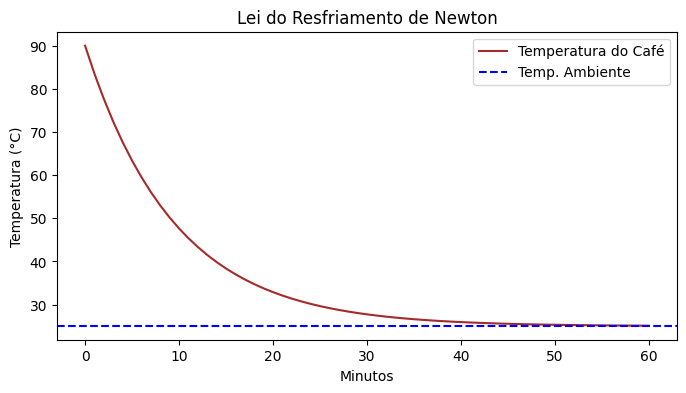

In [49]:
# Equação: dT/dt = -k * (T - T_ambiente)
#T(0) = 90ºC (café ve==fervendo), T_ambiente = 25ºC

def resfriamento(t, T):
    k = 0.1 # Constante térmica da xícara
    T_amb = 25
    return -k * (T - T_amb)

# Resolvido por 60 minutos
t2, temp2 = metodo_edo(resfriamento, y0=90, t0=0, tf=60, h=1.0)

print (f"Temperatura após minutos{t2[-1]:.1f} minutos: {temp2[-1]:.2f}ºC")

plt.figure(figsize=(8, 4))
plt.plot(t2, temp2, label='Temperatura do Café', color='brown')
plt.axhline(25, color='blue', linestyle='--', label='Temp. Ambiente')
plt.title("Lei do Resfriamento de Newton")
plt.xlabel("Minutos")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()

## Problema 3: Queda de paraquedas

In [50]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

g = 9.8 # Gravidade
m = 80 # Massa do paraquedista em kg
k_fechado = 0.25  # Resistência pequena em queda livre
k_aberto = 20.0   # Resistência grande com paraquedas aberto
altura_abertura = 300 # O paraquedas abre a 300 metros do chão

dt = 0.05 # Passo de tempo
t_max = 30 # Tempo total
passos = int(t_max / dt)

tempos = np.linspace(0, t_max, passos)
velocidades = np.zeros(passos)
alturas = np.zeros(passos)
status_paraquedas = [] # Para guardar texto de fechado e aberto

# Condições Iniciais
velocidades[0] = 0 # Começa parado
alturas[0] = 800  # Salta de 800m do chão

# Loop de diferenças finitas com lógica de eventos
for i in range(passos - 1):
    v = velocidades[i]
    h_atual = alturas[i]

    # Lógica para ver se o paraquedas está aberto ou fechado
    if h_atual > altura_abertura:
        k = k_fechado
        status_paraquedas.append("FECHADO")
    else:
        k = k_aberto
        status_paraquedas.append("ABERTO")

    # Equação Diferencial: a = g - (k/m)*v^2
    aceleracao = g - (k/m) * v**2

    velocidades[i+1] = v + dt * aceleracao
    alturas[i+1] = h_atual - dt * v # Subtrai porque está caindo

# Ajuste técnico para o array de status ter o mesmo tamanho
status_paraquedas.append(status_paraquedas[-1])

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(-5, 5)
ax.set_ylim(0, 850)

ax.axhline(0, color='green', linewidth=5, label='Chão')
ax.axhline(altura_abertura, color='red', linestyle='--', alpha=0.5, label='Altitude de Abertura (300m)')

ponto, = ax.plot([], [], 'bo', markersize=10, zorder=5)

linha, = ax.plot([], [], 'b-', alpha=0.5)

texto_info = ax.text(-4.5, 780, '', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
texto_status = ax.text(0.5, 780, '', fontsize=12, fontweight='bold', color='red')

ax.set_title("Simulação Salto de Paraquedas")
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)

def init():
    ponto.set_data([], [])
    linha.set_data([], [])
    texto_info.set_text('')
    texto_status.set_text('')
    return ponto, linha, texto_info, texto_status

def update(frame):
    y = alturas[frame]
    v = velocidades[frame]
    stat = status_paraquedas[frame]

    if y <= 0:
        y = 0
        v = 0
        stat = "POUSOU"

    ponto.set_data([0], [y])

    linha.set_data([0, 0], [y, y + v*0.5])

    if "ABERTO" in stat:
        ponto.set_color('green')
        ponto.set_markersize(15)
    else:
        ponto.set_color('blue')
        ponto.set_markersize(10)

    texto_info.set_text(f'Alt: {y:.1f}m\nVel: {v:.1f} m/s')
    texto_status.set_text(stat)

    return ponto, linha, texto_info, texto_status

anim_paraquedas = FuncAnimation(fig, update, frames=range(0, passos, 10), init_func=init, blit=True, interval=30)

plt.close()
HTML(anim_paraquedas.to_jshtml())
